In [ ]:
#%pip install scikit-posthocs

In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
from src import soporte as sp

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("data/union_tablas.csv", index_col=0)
df.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


# FASE 3
## Evaluación de Diferencias de Reservas de Vuelos por Nivel Educativo

In [4]:
#Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

df_filtrado = df[["Education", "Flights Booked"]]
df_filtrado.head()

,Education,Flights Booked
0,Bachelor,3
1,Bachelor,2
2,Bachelor,14
3,Bachelor,4
4,Bachelor,0


In [8]:
#Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar) 
#del número de vuelos reservados para cada grupo.

df_agrupado = df_filtrado.groupby("Education")["Flights Booked"].describe()
df_agrupado

#la media es similar

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,251400.0,4.129368,5.257359,0.0,0.0,1.0,8.0,39.0
College,101712.0,4.192209,5.287492,0.0,0.0,1.0,8.0,38.0
Doctor,17616.0,4.202770,5.305066,0.0,0.0,1.0,8.0,32.0
High School or Below,18768.0,4.208919,5.296142,0.0,0.0,1.0,8.0,31.0
Master,12192.0,4.233432,5.266140,0.0,0.0,1.0,8.0,33.0


In [ ]:
#  Prueba Estadística: 
# Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

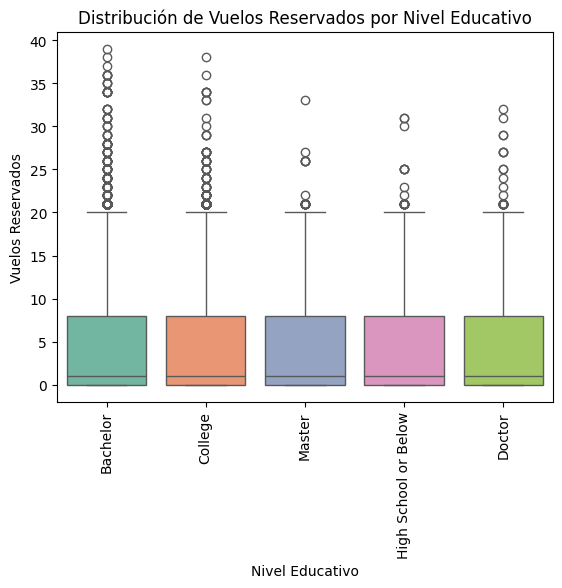

In [90]:
#para visualizar la distribución de los vuelos reservados por nivel educativo al ver una desviación estandard considerada: grafico boxplot.
sns.boxplot(x="Education", y="Flights Booked", data=df_filtrado, palette="Set2")
plt.title("Distribución de Vuelos Reservados por Nivel Educativo")
plt.xlabel("Nivel Educativo")
plt.ylabel("Vuelos Reservados")
plt.xticks(rotation=90);



In [83]:
#la mediana de vuelos reservados es similar en todos los niveles educativos. 
# Hay una cantidad significativa de valores atípicos por cada nivel educativo.

In [ ]:
pd.crosstab(df_filtrado["Education"], df_filtrado["Flights Booked"])
# No es un problema de proporciones

In [91]:
sp.normalidad(df_filtrado, "Flights Booked")

#Evaluo la normalidad de los datos utilizando la prueba de Shapiro.
#confirma que los datos NO siguen una distribución normal 

Para la columna Flights Booked los datos no siguen una distribución normal.


In [92]:
#Para clasificar el nivel de estudios en 2 grupos, primero hago un diccionario con los diferentes tipos de estudios y los asocio a un nivel: basic o advanced"
nivel_estudios = {"High School or Below": "Basic",
    "College": "Basic",  
    "Bachelor": "Advanced",
    "Master": "Advanced",
    "Doctor": "Advanced"}

In [93]:
#Creo una columna nueva con el nivel de educación y le aplico el diccionario con la función MAP
df_filtrado["Level Education"] = df_filtrado["Education"].map(nivel_estudios)

In [32]:
df_filtrado.head()

,Education,Flights Booked,Level Education
0,Bachelor,3,Advanced
1,Bachelor,2,Advanced
2,Bachelor,14,Advanced
3,Bachelor,4,Advanced
4,Bachelor,0,Advanced


In [94]:
#Hago 2 grupos para el estudio: grupo basic con nivel basico de estudios y grupo advanced con nivel avanzado de estudios
grupo_basic = df_filtrado[df_filtrado["Level Education"] == "Basic"]["Flights Booked"]
grupo_advanced = df_filtrado[df_filtrado["Level Education"] == "Advanced"]["Flights Booked"]

In [96]:
print(f"La MEDIA de vuelos realizados por el grupo con nivel de estudios básico es: {round(grupo_basic.mean(), 2)}")
print(f"La MEDIA de vuelos realizados por el grupo con nivel de estudios avanzados es: {round(grupo_advanced.mean(), 2)}")

La MEDIA de vuelos realizados por el grupo con nivel de estudios básico es: 4.19
La MEDIA de vuelos realizados por el grupo con nivel de estudios avanzados es: 4.14


In [95]:
print(f"La MEDIANA de vuelos realizados por el grupo con nivel de estudios básico es: {round(grupo_basic.median(), 2)}")
print(f"La MEDIANA de vuelos realizados por el grupo con nivel de estudios avanzados es: {round(grupo_advanced.median(), 2)}")

La MEDIANA de vuelos realizados por el grupo con nivel de estudios básico es: 1.0
La MEDIANA de vuelos realizados por el grupo con nivel de estudios avanzados es: 1.0


In [ ]:
#levene para medir la homogeneidad de varianzas: 

In [97]:
# Realizamos el test de Levene
stat, p_value = levene(grupo_basic, grupo_advanced)

# Imprimimos el resultado
print(f"Estadístico de Levene: {stat}")
print(f"Valor p: {p_value}")

# Interpretación del resultado
alpha = 0.05  # Nivel de significancia comúnmente usado
if p_value < alpha:
    print("Las varianzas son significativamente diferentes entre los grupos.")
else:
    print("No hay evidencia suficiente para decir que las varianzas son diferentes.")

Estadístico de Levene: 9.339893634095281
Valor p: 0.0022423324734499677
Las varianzas son significativamente diferentes entre los grupos.


In [ ]:
# ya que los datos no son normales y confirmamos que las varianzas son significativamente diferentes
# procedo a hacer el test de Mann-Whitney, puesto que no requere que los datos sean normales.

si p_value < 0.05 --> SI existe una diferencia significativa

si p_value > 0.05 --> NO existe diferencia significativa

In [59]:
_, p_value = mannwhitneyu(grupo_basic, grupo_advanced)

print(p_value)

0.0026215363669007336


In [60]:
p_value < 0.05

#SI existe una diferencia significativa entre el nivel de estudios y el número de vuelos realizados

np.True_

In [ ]:
# El test de Kruskal-Wallis es una extensión del test de Mann-Whitney para más de dos grupos. 
# Es una prueba no paramétrica que se usa para comparar las medianas de tres o más grupos independientes y 
# determinar si al menos uno de los grupos tiene una distribución diferente de los demás.

#Al igual que el test de Mann-Whitney, Kruskal-Wallis no asume normalidad y es adecuado cuando las varianzas 
# no son iguales entre los grupos, como en el caso del test de Levene.

In [6]:
from scipy.stats import kruskal

# Dividimos los datos en grupos por nivel educativo
grupos = [grupo["Flights Booked"].values for _, grupo in df_filtrado.groupby("Education")]

# Prueba de Kruskal-Wallis
stat, p_value = kruskal(*grupos)
print(f"Kruskal-Wallis: estadístico={stat}, valor p={p_value}")
if p_value < 0.05:
    print("Hay una diferencia significativa entre los grupos.")
else:
    print("No hay evidencia suficiente para decir que los grupos son diferentes.")

Kruskal-Wallis: estadístico=18.71507053972487, valor p=0.0008939855290647737
Hay una diferencia significativa entre los grupos.


In [ ]:
# Con un valor p < 0.05, podemos concluir que existen diferencias significativas en el número de vuelos reservados entre los 
# diferentes niveles educativos. 
# Esto sugiere que el nivel educativo tiene un efecto en la cantidad de vuelos reservados por los participantes.
# junto con los datos estadisticos podriamos decir que: 

# Aunque las medias son cercanas, algunas de las diferencias en la cantidad de vuelos máximos podrían reflejar ciertos patrones:
# Posibles diferencias en el acceso o recursos: Los grupos con niveles educativos más altos, como Doctorado o Máster, 
# podrían tener más recursos financieros o profesionales que les permitan realizar más viajes, 
# lo que podría reflejarse en el valor máximo (hasta 39 vuelos reservados en el caso de "Bachelor" y "College").
# Las personas con menos educación formal (por ejemplo, "High School or Below") 
# podrían tener diferentes motivos para viajar, por ejemplo mayor necesidad de desplazamiento por motivos laborales.

In [9]:
df_agrupado

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,251400.0,4.129368,5.257359,0.0,0.0,1.0,8.0,39.0
College,101712.0,4.192209,5.287492,0.0,0.0,1.0,8.0,38.0
Doctor,17616.0,4.202770,5.305066,0.0,0.0,1.0,8.0,32.0
High School or Below,18768.0,4.208919,5.296142,0.0,0.0,1.0,8.0,31.0
Master,12192.0,4.233432,5.266140,0.0,0.0,1.0,8.0,33.0


In [13]:
from scipy.stats import kruskal
import scikit_posthocs as sc

# Dividimos los datos en grupos por nivel educativo
grupos = [grupo["Flights Booked"].values for _, grupo in df_filtrado.groupby("Education")]

# Prueba de Kruskal-Wallis
stat, p_value = kruskal(*grupos)
print(f"Kruskal-Wallis: estadístico={stat}, valor p={p_value}")
if p_value < 0.05:
    print("\nSe han encontrado diferencias significativas, realizando prueba post-hoc de Dunn...")
    posthoc_result = sc.posthoc_dunn(df_filtrado, val_col='Flights Booked', group_col='Education', p_adjust='bonferroni')
    display(posthoc_result)
else:
    print("No hay evidencia suficiente para decir que los grupos son diferentes.")

Kruskal-Wallis: estadístico=18.71507053972487, valor p=0.0008939855290647737

Se han encontrado diferencias significativas, realizando prueba post-hoc de Dunn...


,Bachelor,College,Doctor,High School or Below,Master
Bachelor,1.000000,0.02064,0.782277,0.280907,0.101581
College,0.020640,1.00000,1.000000,1.000000,1.000000
Doctor,0.782277,1.00000,1.000000,1.000000,1.000000
High School or Below,0.280907,1.00000,1.000000,1.000000,1.000000
Master,0.101581,1.00000,1.000000,1.000000,1.000000


Resumen de las comparaciones significativas:
- Bachelor vs College: p = 0.02064 → Significativa.
- Bachelor vs Master: p = 0.101581 → No significativa (p > 0.05).
- Bachelor vs High School or Below: p = 0.280907 → No significativa (p > 0.05).
- College vs Doctor: p = 1.000000 → No significativa (p > 0.05).
- College vs High School or Below: p = 1.000000 → No significativa (p > 0.05).
- College vs Master: p = 1.000000 → No significativa (p > 0.05).
- Doctor vs High School or Below: p = 1.000000 → No significativa (p > 0.05).
- Doctor vs Master: p = 1.000000 → No significativa (p > 0.05).
- High School or Below vs Master: p = 1.000000 → No significativa (p > 0.05).

Conclusión final: NO existe diferencia significativa entre el nivel educativo y el número de vuelos, salvo en la comparación entre:
Bachelor y Collage, que si existe esa diferencia significativa. 